In [1]:
import re, ast, json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import clear_output

In [2]:
log_path = Path("../logs/celery/worker.log")

pat = re.compile(r"Task\s+logistica\.procesar_entrega\[(?P<task_id>[^\]]+)\]\s+succeeded\s+in\s+(?P<secs>[\d\.]+)s:\s+(?P<payload>\{.*\})")

rows=[]
with log_path.open("r", encoding="utf-8") as f:
    for line in f:
        m = pat.search(line)
        if not m:
            continue
        task_id = m.group("task_id").strip()
        duration = float(m.group("secs"))
        payload_txt = m.group("payload")
        try:
            payload = ast.literal_eval(payload_txt)
        except Exception:
            try: payload = json.loads(payload_txt.replace("'", '"'))
            except Exception: payload = {}
        rows.append({
            "entrega_id": payload.get("entrega_id"),
            "task_id": task_id,
            "status": payload.get("status"),
            "retry": payload.get("retry_count"),
            "duration_s": duration,
        })

In [3]:
df = pd.DataFrame(rows, columns=["entrega_id","task_id","status","retry","duration_s"])\
    .sort_values(["entrega_id","retry"])\
    .reset_index(drop=True)

clear_output(wait=True)
out = Path(".")
out.mkdir(parents=True, exist_ok=True)
df.to_csv(out / "worker_filtered.csv", index=False)

,entrega_id,task_id,status,retry,duration_s
0,47,01742ca0-bc2e-4fc0-a0ef-c6b73d579d65,PENDING_SYSTEM_CONFIRMATION,0,1.226802
1,47,96bc4e02-4677-4b6c-af13-733a12e87e4e,PENDING_SYSTEM_CONFIRMATION,1,0.446117
2,47,ec929632-9100-43c3-9149-64ccf924ab3a,ENTREGADA,2,0.618007


Resumen duración (s):
count    3.000000
mean     0.763642
std      0.410212
min      0.446117
50%      0.618007
90%      1.105043
95%      1.165922
99%      1.214626
max      1.226802
Name: duration_s, dtype: float64


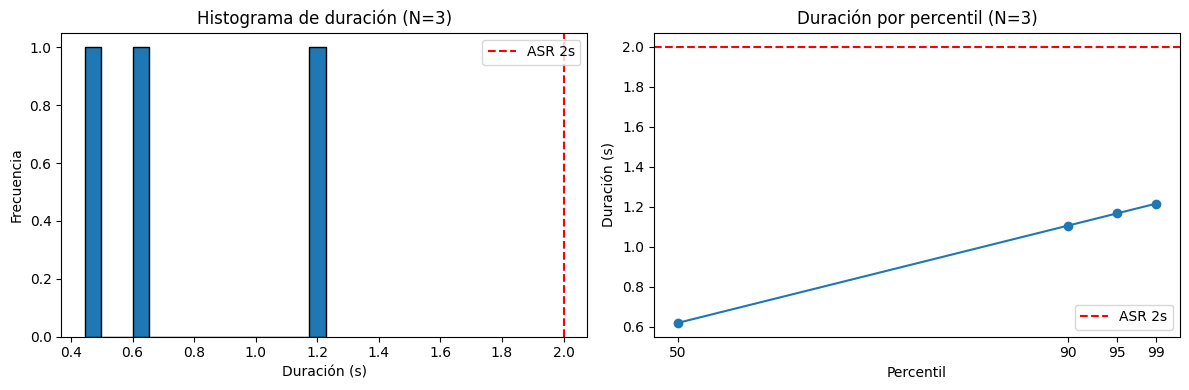

In [4]:
df = pd.DataFrame(rows, columns=["entrega_id","task_id","status","retry","duration_s"])\
    .sort_values(["entrega_id","retry"])\
    .reset_index(drop=True)
display(df.head(10))

print("Resumen duración (s):")
print(df["duration_s"].describe(percentiles=[.5,.9,.95,.99]))

fig, axes = plt.subplots(1, 2, figsize=(12,4))
n = len(df)

# Histograma
axes[0].hist(df["duration_s"], bins=15, edgecolor="black")
axes[0].axvline(2, color="red", linestyle="--", label="ASR 2s")
axes[0].set_title(f"Histograma de duración (N={n})")
axes[0].set_xlabel("Duración (s)")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Percentiles
percentiles = [50, 90, 95, 99]
values = [df["duration_s"].quantile(p/100) for p in percentiles]
axes[1].plot(percentiles, values, marker="o")
axes[1].axhline(2, color="red", linestyle="--", label="ASR 2s")
axes[1].set_title(f"Duración por percentil (N={n})")
axes[1].set_xlabel("Percentil")
axes[1].set_ylabel("Duración (s)")
axes[1].set_xticks(percentiles)
axes[1].legend()

plt.tight_layout()
plt.show()

,entrega_id,task_id,status,retry,duration_s
0,47,ec929632-9100-43c3-9149-64ccf924ab3a,ENTREGADA,2,0.618007


Resumen duración (s):
count    1.000000
mean     0.618007
std           NaN
min      0.618007
50%      0.618007
90%      0.618007
95%      0.618007
99%      0.618007
max      0.618007
Name: duration_s, dtype: float64


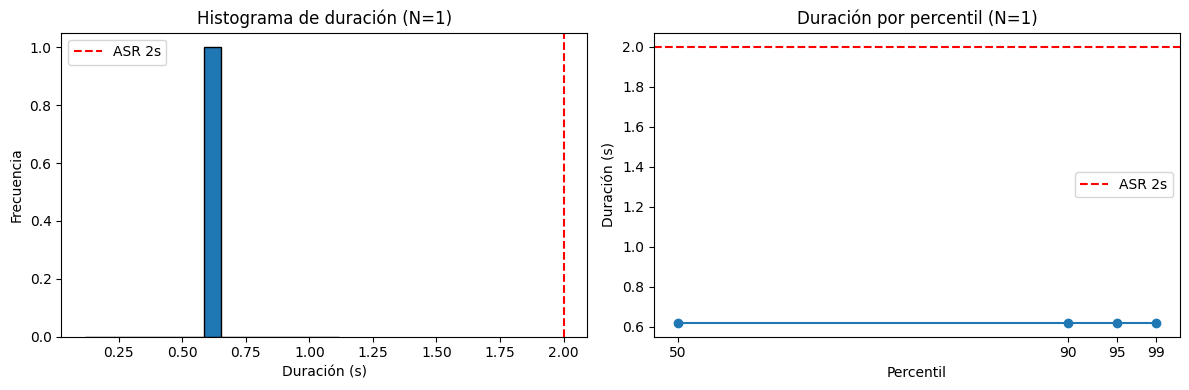

In [5]:
df = pd.DataFrame(rows, columns=["entrega_id","task_id","status","retry","duration_s"])\
    .query("status == 'ENTREGADA'")\
    .sort_values(["entrega_id","retry"])\
    .reset_index(drop=True)
display(df.head(10))

print("Resumen duración (s):")
print(df["duration_s"].describe(percentiles=[.5,.9,.95,.99]))


fig, axes = plt.subplots(1, 2, figsize=(12,4))
n = len(df)

# Histograma
axes[0].hist(df["duration_s"], bins=15, edgecolor="black")
axes[0].axvline(2, color="red", linestyle="--", label="ASR 2s")
axes[0].set_title(f"Histograma de duración (N={n})")
axes[0].set_xlabel("Duración (s)")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Percentiles
percentiles = [50, 90, 95, 99]
values = [df["duration_s"].quantile(p/100) for p in percentiles]
axes[1].plot(percentiles, values, marker="o")
axes[1].axhline(2, color="red", linestyle="--", label="ASR 2s")
axes[1].set_title(f"Duración por percentil (N={n})")
axes[1].set_xlabel("Percentil")
axes[1].set_ylabel("Duración (s)")
axes[1].set_xticks(percentiles)
axes[1].legend()

plt.tight_layout()
plt.show()

,entrega_id,task_id,status,retry,duration_s
0,47,01742ca0-bc2e-4fc0-a0ef-c6b73d579d65,PENDING_SYSTEM_CONFIRMATION,0,1.226802
1,47,96bc4e02-4677-4b6c-af13-733a12e87e4e,PENDING_SYSTEM_CONFIRMATION,1,0.446117


Resumen duración (s):
count    2.000000
mean     0.836460
std      0.552027
min      0.446117
50%      0.836460
90%      1.148733
95%      1.187768
99%      1.218995
max      1.226802
Name: duration_s, dtype: float64


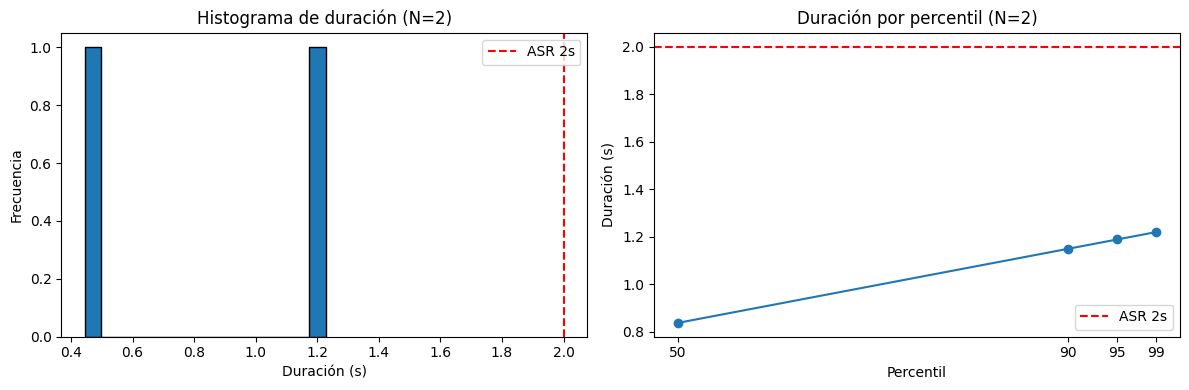

In [6]:
df = pd.DataFrame(rows, columns=["entrega_id","task_id","status","retry","duration_s"])\
    .query("status == 'PENDING_SYSTEM_CONFIRMATION'")\
    .sort_values(["entrega_id","retry"])\
    .reset_index(drop=True)
display(df.head(10))

print("Resumen duración (s):")
print(df["duration_s"].describe(percentiles=[.5,.9,.95,.99]))


fig, axes = plt.subplots(1, 2, figsize=(12,4))
n = len(df)

# Histograma
axes[0].hist(df["duration_s"], bins=15, edgecolor="black")
axes[0].axvline(2, color="red", linestyle="--", label="ASR 2s")
axes[0].set_title(f"Histograma de duración (N={n})")
axes[0].set_xlabel("Duración (s)")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Percentiles
percentiles = [50, 90, 95, 99]
values = [df["duration_s"].quantile(p/100) for p in percentiles]
axes[1].plot(percentiles, values, marker="o")
axes[1].axhline(2, color="red", linestyle="--", label="ASR 2s")
axes[1].set_title(f"Duración por percentil (N={n})")
axes[1].set_xlabel("Percentil")
axes[1].set_ylabel("Duración (s)")
axes[1].set_xticks(percentiles)
axes[1].legend()

plt.tight_layout()
plt.show()